# Oppgave: Lineær regresjon for predikering av huspriser

I denne oppgave skal vi prøve å predikere prisen på hus ut fra størrelsen, antall soverom, utsikt osv.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from useful_tools import ModelTester

**Oppgave 1:** Les inn dataene, og splitt del de inn i trening- og testdata.

Filnavnet finnes i variabelen `filename` og variablene vi ikke er interesserte i, finnes i listen `to_drop`. Disse må du fjerne fra DataFramen etter at den er lest inn.

*Hint:* Det kan være lurt å kvitte seg med kolonnene og skille variablene fra responsen (prisen) *før* du deler opp i trening- og testsett. Hvis ikke må du gjøre dette to ganger.

In [14]:
filename = '../datasets/housesaleprediction/kc_house_data.csv'


# Løsning
with open(filename) as infile:
    data = pd.read_csv(infile)
    
data.drop(['id', 'date', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

X = data.drop(['price'], axis=1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Kanskje ikke nødvendig.
tester = ModelTester(x_test, y_test)

In [15]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


**Oppgave 2:** Regresjon med en variabel

Først vil vi se på hvordan prisen lar seg påvirke av størrelsen på boligen (`sqft_living`).

Plott først prisen på husene i treningsettet mot størrelsen (*Hint*: `plt.scatter`)
Synes du det ser ut til å være et lineært forhold?

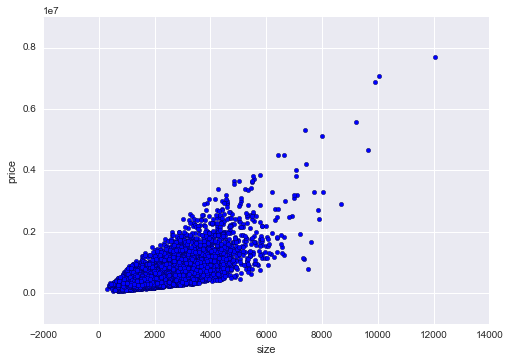

In [16]:
# Løsning
plt.scatter(x_train[['sqft_living']], y_train)
plt.xlabel('size')
plt.ylabel('price')
plt.show()

Tilpass så en lineær regresjonsmodell med og plott linja sammen med punktene i et nytt plot.

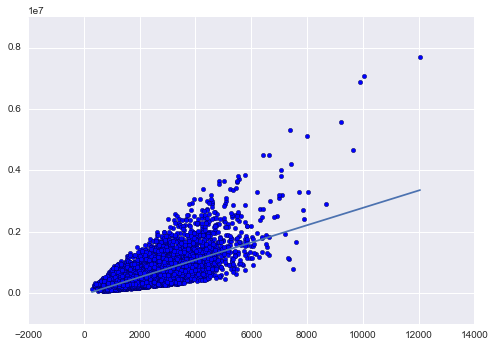

In [17]:
# Løsning
reg = LinearRegression()
reg.fit(x_train[['sqft_living']], y_train)

t = np.linspace(x_train['sqft_living'].min(), x_train['sqft_living'].max(), 10).reshape((-1, 1))
line = reg.predict(t)

plt.scatter(x_train[['sqft_living']], y_train)
plt.plot(t, line)
plt.show()

Regn ut testfeilen

In [18]:
# Løsning
tester = ModelTester(x_test, y_test)
mse = tester.test_regressor(reg, ['sqft_living'])
print(np.sqrt(mse))

MSE:  70786955062.8
266058.179846


# Flere variable

**Oppgave 3:** Tilpasse en lineær modell med alle forklaringsvariablene. Kommenter endringen i testfeil

*Tips:* `df.columns.values` gir deg en array med kolonnenavnene til `df`.

In [19]:
# Løsning
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built']
variables = x_train.columns.values
model_all = LinearRegression()
model_all.fit(x_train[variables], y_train)

mse = tester.test_regressor(model_all, variables)
print(np.sqrt(mse))

MSE:  47962126186.1
219002.571186
